# RNA-Seq Analysis Training Demo

## Overview

This tutorial will show you the following workflow that is used to generate the list of differentially expressed genes. Running the code in this tutorial should take approximately 15 minutes.

This overflow centers roughly around the useage of the deseq2 package. Documentation for this package can be found here: https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html

![RNA-Seq workflow](images/count-workflow.png)

In [1]:
# Download Miniforge
system('curl -L -O https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh', intern = TRUE)

# Install Miniforge
system('bash Miniforge3-$(uname)-$(uname -m).sh -b -u -p $HOME/miniforge', intern = TRUE)

# Add Miniforge bin to the system path
Sys.setenv(PATH = paste(Sys.getenv("HOME"), "/miniforge/bin:", Sys.getenv("PATH"), sep = ""))

character(0)

[1] "PREFIX=/home/ec2-user/miniforge"                                                                            
  [2] ""                                                                                                           
  [3] "Transaction"                                                                                                
  [4] ""                                                                                                           
  [5] "  Prefix: /home/ec2-user/miniforge/envs/_virtual_specs_checks"                                              
  [6] ""                                                                                                           
  [7] "  All requested packages already installed"                                                                 
  [8] ""                                                                                                           
  [9] "Dry run. Not executing the transaction."                                                                    
 [10] "Unpacking payload ..."                                                                                      
 [11] "Extracting _libgcc_mutex-0.1-conda_forge.tar.bz2"                                                           
 [12] "Extracting ca-certificates-2024.8.30-hbcca054_0.conda"                                                      
 [13] "Extracting ld_impl_linux-64-2.40-hf3520f5_7.conda"                                                          
 [14] "Extracting pybind11-abi-4-hd8ed1ab_3.tar.bz2"                                                               
 [15] "Extracting python_abi-3.12-5_cp312.conda"                                                                   
 [16] "Extracting tzdata-2024a-h8827d51_1.conda"                                                                   
 [17] "Extracting libgomp-14.1.0-h77fa898_1.conda"                                                                 
 [18] "Extracting _openmp_mutex-4.5-2_gnu.tar.bz2"                                                                 
 [19] "Extracting libgcc-14.1.0-h77fa898_1.conda"                                                                  
 [20] "Extracting libexpat-2.6.3-h5888daf_0.conda"                                                                 
 [21] "Extracting libgcc-ng-14.1.0-h69a702a_1.conda"                                                               
 [22] "Extracting libstdcxx-14.1.0-hc0a3c3a_1.conda"                                                               
 [23] "Extracting openssl-3.3.2-hb9d3cd8_0.conda"                                                                  
 [24] "Extracting bzip2-1.0.8-h4bc722e_7.conda"                                                                    
 [25] "Extracting c-ares-1.32.3-h4bc722e_0.conda"                                                                  
 [26] "Extracting keyutils-1.6.1-h166bdaf_0.tar.bz2"                                                               
 [27] "Extracting libev-4.33-hd590300_2.conda"                                                                     
 [28] "Extracting libffi-3.4.2-h7f98852_5.tar.bz2"                                                                 
 [29] "Extracting libiconv-1.17-hd590300_2.conda"                                                                  
 [30] "Extracting libnsl-2.0.1-hd590300_0.conda"                                                                   
 [31] "Extracting libstdcxx-ng-14.1.0-h4852527_1.conda"                                                            
 [32] "Extracting libuuid-2.38.1-h0b41bf4_0.conda"                                                                 
 [33] "Extracting libxcrypt-4.4.36-hd590300_1.conda"                                                               
 [34] "Extracting libzlib-1.3.1-h4ab18f5_1.conda"                                                                  
 [35] "Extracting lzo-2.10-hd590300_1001.conda"           

In [2]:
# Install gsutil and dependencies using mamba
system('mamba install -y -c conda-forge -c bioconda gsutil', intern = TRUE)

[1] "Transaction"                                                                     
 [2] ""                                                                                
 [3] "  Prefix: /home/ec2-user/anaconda3/envs/R"                                       
 [4] ""                                                                                
 [5] "  Updating specs:"                                                               
 [6] ""                                                                                
 [7] "   - gsutil"                                                                     
 [8] "   - ca-certificates"                                                            
 [9] "   - certifi"                                                                    
[10] "   - openssl"                                                                    
[11] ""                                                                                
[12] ""                                                                                
[13] "  Package                   Version  Build               Channel          Size"  
[14] "────────────────────────────────────────────────────────────────────────────────"
[15] "  Install:"                                                                      
[16] "────────────────────────────────────────────────────────────────────────────────"
[17] ""                                                                                
[18] "  + boto                     2.49.0  py_0                conda-forge     858kB"  
[19] "  + pyu2f                     0.1.5  pyhd8ed1ab_0        conda-forge      32kB"  
[20] "  + argcomplete               3.5.1  pyhd8ed1ab_0        conda-forge      41kB"  
[21] "  + fasteners                0.17.3  pyhd8ed1ab_0        conda-forge      20kB"  
[22] "  + monotonic                   1.5  pyhd8ed1ab_1        conda-forge      13kB"  
[23] "  + retry_decorator           1.1.1  pyh9f0ad1d_0        conda-forge       7kB"  
[24] "  + cachetools                5.5.0  pyhd8ed1ab_0        conda-forge      15kB"  
[25] "  + pyasn1                    0.6.1  pyhd8ed1ab_1        conda-forge      62kB"  
[26] "  + pyparsing                 3.1.4  pyhd8ed1ab_0        conda-forge      90kB"  
[27] "  + attrs                    24.2.0  pyh71513ae_0        conda-forge      56kB"  
[28] "  + aiohappyeyeballs          2.4.3  pyhd8ed1ab_0        conda-forge      19kB"  
[29] "  + google-reauth             0.1.1  pyhd3deb0d_0        conda-forge      18kB"  
[30] "  + pyasn1-modules            0.4.1  pyhd8ed1ab_0        conda-forge      96kB"  
[31] "  + rsa                       4.7.2  pyh44b312d_0        conda-forge      28kB"  
[32] "  + httplib2                 0.20.4  pyhd8ed1ab_0        conda-forge      98kB"  
[33] "  + oauth2client              4.1.3  py_0                conda-forge      67kB"  
[34] "  + google-apitools          0.5.32  pyhd8ed1ab_0        conda-forge      96kB"  
[35] "  + crcmod                      1.7  py311h9ecbd09_1011  conda-forge      42kB"  
[36] "  + frozenlist                1.4.1  py311h9ecbd09_1     conda-forge      60kB"  
[37] "  + multidict                 6.1.0  py311h9ecbd09_0     conda-forge      63kB"  
[38] "  + cryptography             43.0.1  py311hafd3f86_0     conda-forge       2MB"  
[39] "  + yarl                     1.13.1  py311h9ecbd09_0     conda-forge     157kB"  
[40] "  + aiosignal                 1.3.1  pyhd8ed1ab_0        conda-forge      13kB"  
[41] "  + pyopenssl                24.2.1  pyhd8ed1ab_2        conda-forge     128kB"  
[42] "  + aiohttp                  3.10.9  py311h9ecbd09_0     conda-forge     842kB"  
[43] "  + google-auth              2.17.0  pyh1a96a4e_0        conda-forge      99kB"  
[44] "  + google-auth-httplib2      0.2.0  pyhd8ed1ab_0        conda-forge      15kB"  
[45] "  + gcs-oauth2-boto-plugin      3.2  pyhd8ed1ab_0        conda-forge      30kB"  
[46] "  + gsutil                     5.30

### STEP 1: Library Installation

First install the R packages that will be used. <strong>This installation may take around 30 minutes.</strong>

In [3]:
# Install BiocManager if not installed
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# Set repositories
options(repos = BiocManager::repositories())

# Install Bioconductor packages
BiocManager::install(c("ComplexHeatmap", "DESeq2", "EnhancedVolcano"), force = TRUE)

# Install CRAN packages
install.packages(c("dplyr", "pheatmap", "ggrepel", "ggfortify"), dependencies = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    BioCsoft: https://bioconductor.org/packages/3.19/bioc
    BioCann: https://bioconductor.org/packages/3.19/data/annotation
    BioCexp: https://bioconductor.org/packages/3.19/data/experiment
    BioCworkflows: https://bioconductor.org/packages/3.19/workflows
    BioCbooks: https://bioconductor.org/packages/3.19/books
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.1 (2024-06-14)

Installing package(s) 'BiocVersion', 'ComplexHeatmap', 'DESeq2',
  'EnhancedVolcano'

also installing the dependencies ‘UCSC.utils’, ‘Ge

In [4]:
# Load libraries
library(DESeq2)
library(dplyr)
library(ComplexHeatmap)
library(EnhancedVolcano)
library(ggplot2)
library(ggrepel)
library(ggfortify)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading r

### STEP 2: Reading in Data

This step retrieve the Merged Read counts from all samples of Bioproject PRJNA892075, and the feature table, from S3 Bucket. This step involves reformatting or adjusting the data.

To make things easier, we created a matrix, or a table, of just our read-count data -- excluding the non-numerical metadata columns. This makes it easy for us to feed this table into the deseq2 tool later on.

Additionally, later on we will use normalization involving logarithms. So, to prevent errors, we will replace all readcount values of '0' in our data, with '1'. This will change the data only slightly, and will prevent these zeroes from causing an 'undefined' or 'N/A' math error in the logarithm normalization step.


In [6]:
# Check if the directories exist before creating them
if (!dir.exists("data/gene_counts")) {
  dir.create("data/gene_counts", recursive = TRUE)
}

if (!dir.exists("data/reference")) {
  dir.create("data/reference", recursive = TRUE)
}

# Path to the gene counts file
system("wget -P data/gene_counts/ https://sra-data-athena.s3.amazonaws.com/readcounts/merged_gene_counts_zebrafish.txt")
system("wget -P data/reference/ https://sra-data-athena.s3.amazonaws.com/reference/zebrafish_feature_table.txt")

# Define the file paths
counts_file <- "data/gene_counts/merged_gene_counts_zebrafish.txt"
feature_table <- "data/reference/zebrafish_feature_table.txt"


In [7]:
#read-in the raw gene count file to a dataframe variable we named 'read_counts'
read_counts <- read.table('data/gene_counts/merged_gene_counts_zebrafish.txt',head=TRUE)

#amount of columns the dataframe has
cols = ncol(read_counts)

#assign the numerical read counts to a matrix variable we named 'rnaseqMatrix'
rnaseqMatrix <- round(read_counts[,c(2:cols)])

#label the rownames of this matrix with the rowname column from the gene count dataframe.
rownames(rnaseqMatrix) <- read_counts[,1]

head(rnaseqMatrix)

,GSM2121180,GSM2121181,GSM2121182,GSM2121183,GSM2121184,GSM2121185
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSDARG00000000001,129,168,163,107,194,211
ENSDARG00000000002,312,338,426,312,509,411
ENSDARG00000000018,922,1181,1143,828,1403,1104
ENSDARG00000000019,2765,3499,3452,2694,4096,3006
ENSDARG00000000068,1244,1305,1485,1190,1978,1387
ENSDARG00000000069,3124,3360,3545,2460,3913,3450


### STEP 3: Specifying Experimental Design

Next specify the experimental design. 

The deseq2 tool will later use this design to group samples together, and output information about the statistical differences in gene expression between these specified groups.

In [8]:
# define the sample experimental design, in this case 3 control and 3 cortisol infected samples
samples_treatment <- data.frame(matrix(c(rep("DMSO control",3),rep("cortisol",3)),ncol=1))
samples_ID <- data.frame(matrix(colnames(rnaseqMatrix),ncol=1))
samples <- cbind(samples_ID,samples_treatment)
names(samples) <- c("ID","Treatment")
rownames(samples) <- samples[,1]

print("An example of how a deseq2 experimental design table might look.")
samples

[1] "An example of how a deseq2 experimental design table might look."


,ID,Treatment
,<chr>,<chr>
GSM2121180,GSM2121180,DMSO control
GSM2121181,GSM2121181,DMSO control
GSM2121182,GSM2121182,DMSO control
GSM2121183,GSM2121183,cortisol
GSM2121184,GSM2121184,cortisol
GSM2121185,GSM2121185,cortisol


### STEP 4: Creating Deseq2 Object

Now use the treatment design matrix in combination with the readcount matrix to create a deseq2 object. 

Once created, this is also a good opportunity to filter out lowly expresseed genes, and to inspect the pre-normalized data using pairwise comparison plots. These example plots, the pairwise plot and boxplot, can be used to examine gene expression distributions and highlight outliers.

Finally, the deseq2 analysis can be run on the deseq2 object.

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



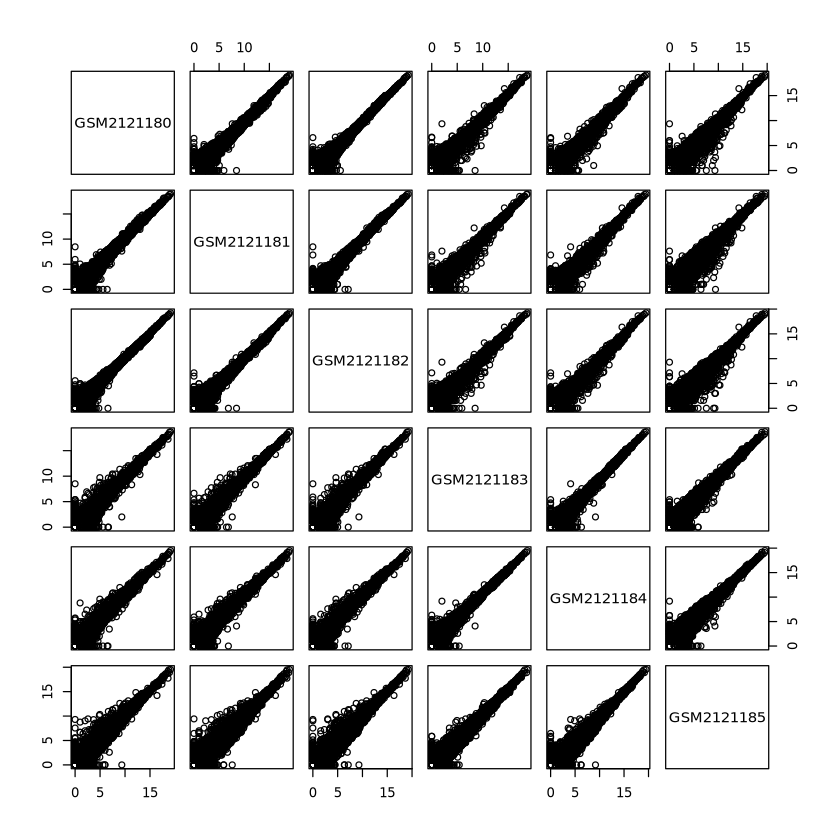

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing



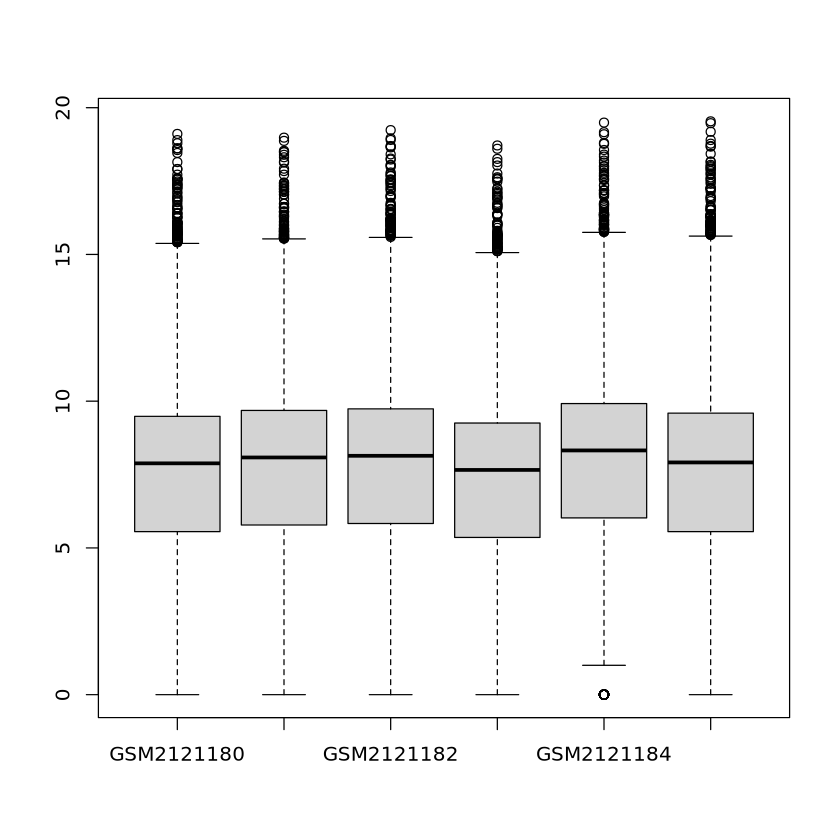

In [9]:
#Create the DEseq2DataSet object
deseq2Data <- DESeqDataSetFromMatrix(countData = rnaseqMatrix, colData = samples, design = ~ Treatment)

# Perform pre-filtering of the data (deseq2 also automatically does this, but can this can increase speed)
deseq2Data <- deseq2Data[rowSums(counts(deseq2Data)) > 10, ]

# Inspect pre-normalized data 
pairs(log2((counts(deseq2Data)+1)))
boxplot(log2((counts(deseq2Data)+1)))

# Run pipeline for differential expression steps
deseq2Data <- DESeq(deseq2Data)


### STEP 5: Normalize Data

DESeq2 automatically normalizes data in the DESeq() step using a method called median of ratios. For our own downstream analysis we can pick from several different normalization methods. As an example, here we use rlog transformation, or regularized log transformation to normalize data. This method is similar to log normalization, but includes a 'shrinkage' estimator to attempt to shrink the variance of the log-transformed data. More information for this and other normalization methods can be found in the DESeq2 documentation. 

Normalization of gene readcounts across samples will help to minimize sample variation noise and ensure more accurate comparisons. Looking at normalized plots can be an easy way to look out for any obvious inconsistencies or errors in the sample data. 

In [10]:
#perform rlog normalization on deseq2 object
rld <- rlog(deseq2Data, blind=FALSE)

#a handy variable so we can easily reference the rlog genecount matrix in the future, as deseq objects contain many tables of data.
rlogcounts <- assay(rld)
rownames(rlogcounts) <- rownames(deseq2Data)

head(rlogcounts)

,GSM2121180,GSM2121181,GSM2121182,GSM2121183,GSM2121184,GSM2121185
ENSDARG00000000001,7.242900,7.313412,7.270920,7.235694,7.299065,7.466778
ENSDARG00000000002,8.483313,8.455460,8.576366,8.597590,8.618921,8.624652
ENSDARG00000000018,10.008432,10.112847,10.041334,10.058309,10.113516,10.099280
ENSDARG00000000019,11.583234,11.685099,11.625281,11.710190,11.672458,11.595282
ENSDARG00000000068,10.418699,10.357161,10.420824,10.524167,10.565707,10.451615
ENSDARG00000000069,11.701924,11.658670,11.658956,11.638916,11.641449,11.728394


Normalization of data can is often verified by inspecting by various plots, such as histograms (these typically follow a negative binomial distribution, as shown below):

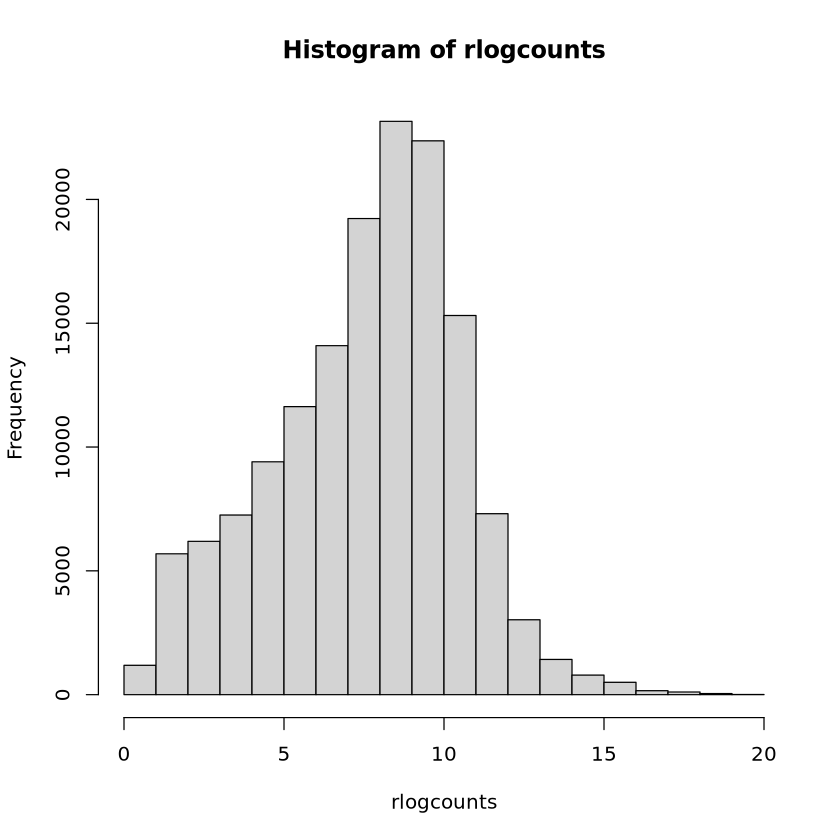

In [11]:
hist(rlogcounts)

Boxplots:

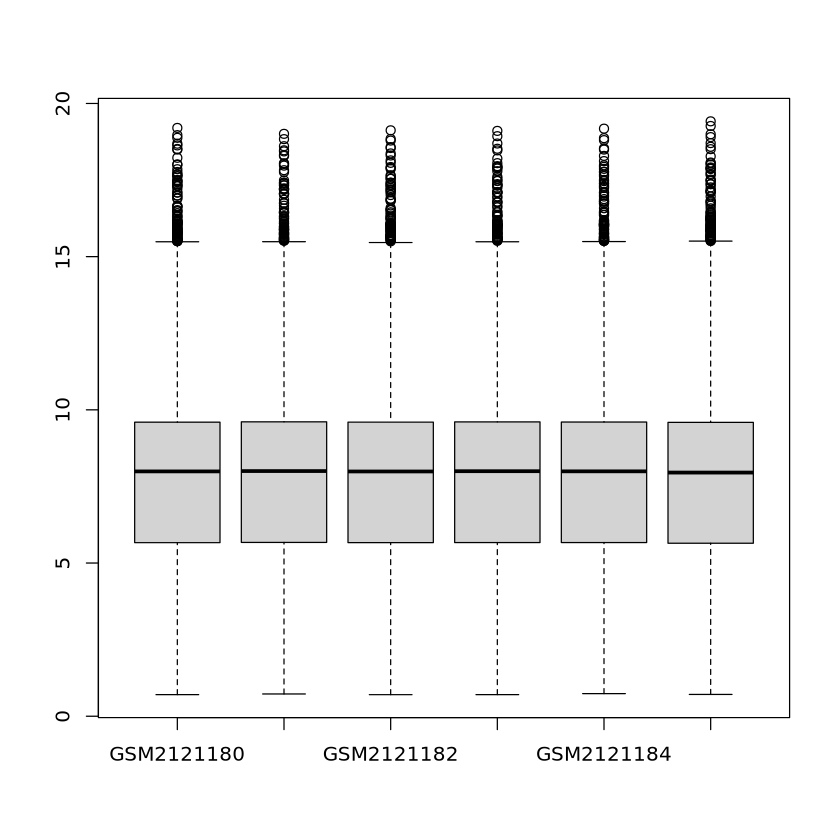

In [12]:
boxplot(rlogcounts)

Or pairwise comparison plots. Notice how sample groups can be visualized just by looking at the pairwise plot.

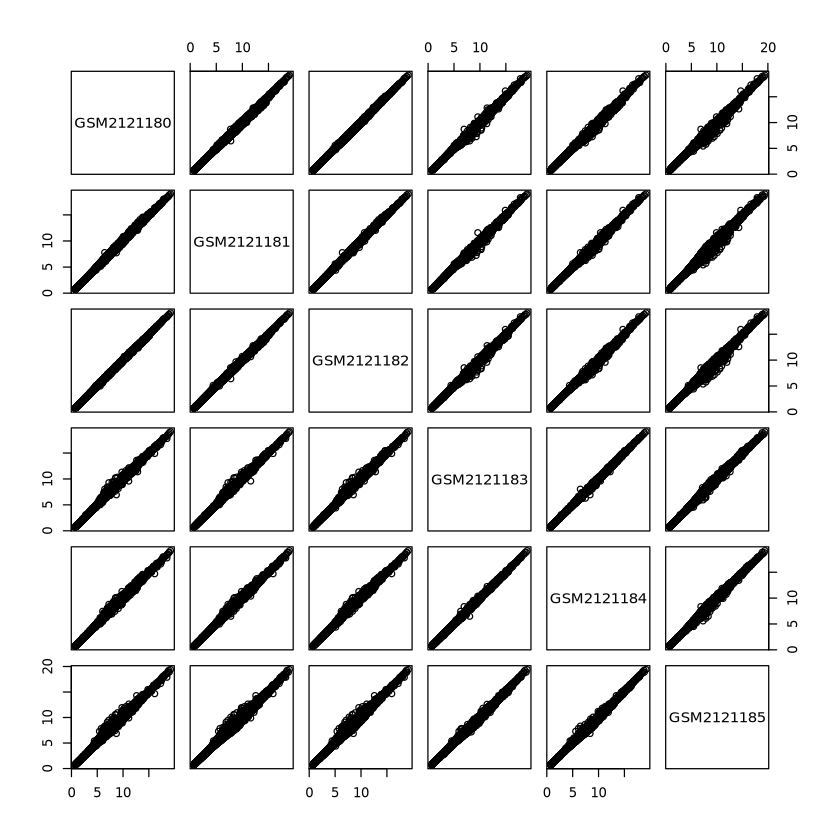

In [13]:
pairs(rlogcounts)

Compare the plots of the pre-normalized and normalized data to see the effect of normalization.

Notice how the samples in the box plot, and in-group samples in the pair plots display similar distributions.

Looking at normalized plots can be an easy way to look out for any obvious inconsistencies or errors in the sample data.

### STEP 6: PCA Plot

We can now begin to produce plots to further analyze the differences between groups.

PCA plots can be an effective way to visualize variation within and between sample sets.

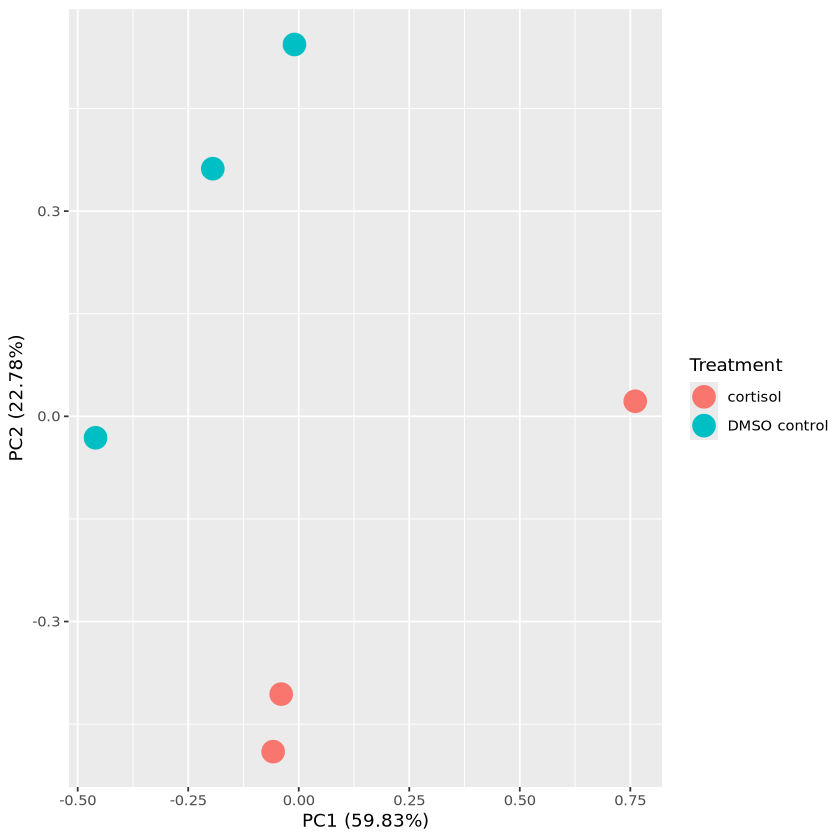

In [14]:
pca_counts <- prcomp(t(rlogcounts))
autoplot(pca_counts, data = samples, colour="Treatment", size=6)

Plots can be output as above, or also saved as pdf or image files, as below. Try to navigate and click to the created file, after you run the code. 

Tiff files can also be created this way.

In [15]:
pdf("data/gene_counts/PCA_Plot.pdf")
autoplot(pca_counts, data = samples, colour="Treatment", size=6)
dev.off()

tiff("data/gene_counts/PCA_Plot.tiff")
autoplot(pca_counts, data = samples, colour="Treatment", size=6)
dev.off()    

pdf 
  2

pdf 
  2

### STEP 7: Contrast Comparisons

Contrast comparisons between two treatment groups can be performed using the deseq2 tool to identify differentially up and down regulated genes.

Using R, these results can be summarized, reordered, and/or trimmed.

Differentially expressed genes are typically quantified as those genes which have an adjusted P value of below 0.05. An adjusted P value is also sometimes referred to as a false discovery rate, or FDR. In the below, there are 1357 differentially expressed genes. For the sake of reducing the amount of differentially expressed genes, to make analyses easier, these could also be further refined by introducing a threshold based on fold-change. DEseq2 uses the Wald and Benjamini-Hochberg tests for determining P and Adjusted P values, respectively. More information on this can be found in the DEseq2 documentation. 

In [20]:
#Output the results of comparing WT and BPs_lysogen group
res_control_cortisol <- results(deseq2Data, contrast=c("Treatment","DMSO control","cortisol"))
summary(res_control_cortisol)
print("Number of genes under a p value of 0.05")
sum(res_control_cortisol$pvalue < 0.05, na.rm=TRUE)
print("Number of genes under a p adjusted value of 0.05")
sum(res_control_cortisol$padj < 0.05, na.rm=TRUE)


#deseq2 optionally output some padj values as 'NA' when genecounts meet certain criteria
#that criteria can be found here: https://bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html#pvaluesNA
#for practical uses, one could replace the NA values with '1', essentially NA values not significant.
res_control_cortisol$padj[is.na(res_control_cortisol$padj)] <- 1


out of 24813 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 131, 0.53%
LFC < 0 (down)     : 406, 1.6%
outliers [1]       : 2, 0.0081%
low counts [2]     : 1444, 5.8%
(mean count < 5)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results

[1] "Number of genes under a p value of 0.05"


[1] 1573

[1] "Number of genes under a p adjusted value of 0.05"


[1] 443

### STEP 8: Annotating and Exporting Results

These differentially expressed genes can be annotated and exported.

Combining gene counts with gene annotation isn't always simple, and will vary heavily depending on the annotation file itself.

For example, when merging genecounts by 'gene id' with feature tables from NCBI's assembly database, its very common to have duplicate rows, as a single 'gene id' may match to multiple features. 

Depending on how you want to use your annotated results, you may decide to further reformat your table in whatever suits your further analysis best, for instance by downloading and using a spreadsheet editor.

Because the transcript table for m chelonae we have here is so simple, and contains essentially only one 'CDS' or '..RNA' feature for every gene identifier we are using, it is easy for us to reformat it here in the way we want just using R code. However, it is important to note that, again, this is very often not the case, and reformatting will vary depending on both the annotation file itself, and what that annotation file will be used for.

In [29]:
head (annotation)

,Name,GSM2121180,GSM2121181,GSM2121182,GSM2121183,GSM2121184,GSM2121185
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSDARG00000000001,128.51,168.06,162.73,107.4,194.16,210.86
2,ENSDARG00000000002,312.49,337.94,426.27,311.6,508.84,411.14
3,ENSDARG00000000018,922.00,1181.00,1143.00,828.0,1403.00,1104.00
4,ENSDARG00000000019,2765.00,3499.00,3452.00,2694.0,4096.00,3006.00
5,ENSDARG00000000068,1244.00,1305.00,1485.00,1190.0,1978.00,1387.00
6,ENSDARG00000000069,3124.00,3360.00,3545.00,2460.0,3913.00,3450.00


In [30]:
# Read the annotation file
annotation <- read.table("data/gene_counts/merged_gene_counts_zebrafish.txt", header=TRUE, sep='\t', quote="\"", comment.char = "")

# Convert DESeq2 results to a data frame
results <- data.frame(res_control_cortisol)

# Merge annotation with DESeq2 results
results.annot <- merge(results, annotation, by.x="row.names", by.y="Name", all.x=TRUE)

# If needed, filter out "gene" rows (you can skip this if no such column exists)
# results.annot <- results.annot[annotation$X..feature != 'gene',]

# Rename the first column to 'locus_tag'
colnames(results.annot)[1] <- 'locus_tag'

# Write out the annotated results
write.table(results.annot, "data/gene_counts/control_cortisol_DESeq2_annot.txt", row.names=FALSE, sep="\t")

# View the first few rows of the annotated data
head(results.annot)


,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,GSM2121180,GSM2121181,GSM2121182,GSM2121183,GSM2121184,GSM2121185
,<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSDARG00000000001,158.9574,-0.176893620,0.21459430,-0.82431647,0.40975976,0.9998492,128.51,168.06,162.73,107.4,194.16,210.86
2,ENSDARG00000000002,378.3677,-0.223904319,0.13377012,-1.67379925,0.09417006,0.9492449,312.49,337.94,426.27,311.6,508.84,411.14
3,ENSDARG00000000018,1077.4766,-0.062205545,0.10370377,-0.59983878,0.54861369,0.9998492,922.00,1181.00,1143.00,828.0,1403.00,1104.00
4,ENSDARG00000000019,3206.8959,-0.045480692,0.09987637,-0.45536988,0.64884316,0.9998492,2765.00,3499.00,3452.00,2694.0,4096.00,3006.00
5,ENSDARG00000000068,1408.8376,-0.196233308,0.10288485,-1.90731011,0.05648044,0.7879275,1244.00,1305.00,1485.00,1190.0,1978.00,1387.00
6,ENSDARG00000000069,3263.5279,0.004626424,0.09018984,0.05129651,0.95908925,0.9998492,3124.00,3360.00,3545.00,2460.0,3913.00,3450.00


### STEP 9: More Plots and Clustering Data

Finally, although several other different kind of analysis can be done, it is common to plot the results of differential gene expression analysis in forms such as volcano, MA, and heatmaps. These plots help one to further examine the output list of differentially expressed genes in different ways, and potentially identify or further investigate candidate gene(s).

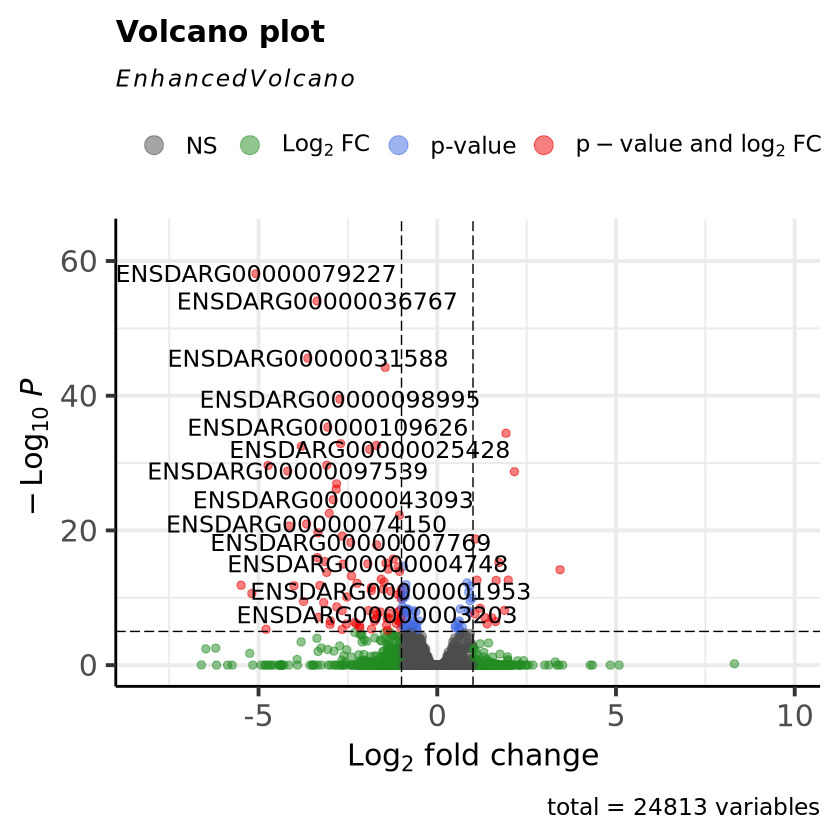

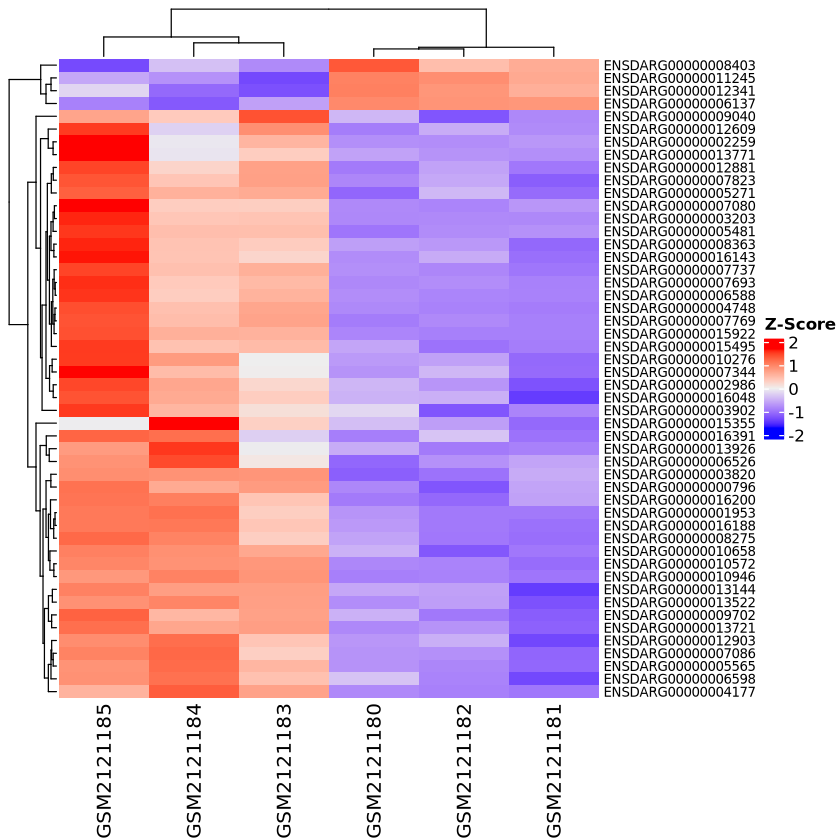

In [32]:
#volcano and ma plots can be used to visualize significant differences in gene expression
results_volc_df <- results.annot
EnhancedVolcano(results_volc_df,
    lab = results_volc_df[,1],
    x = 'log2FoldChange',
    y = 'padj')

#ma plot
plotMA(res_control_cortisol)


#heatmaps can used to look at clustering and expression of various gene lists.
filtered_res <- results.annot %>% filter(padj < 0.05)
filtered_res_counts <- subset(rlogcounts, rownames(rlogcounts) %in% filtered_res[,1])
filtered_res_counts = t(scale(t(filtered_res_counts)))
Heatmap(filtered_res_counts[1:50,], name = "Z-Score", row_names_gp = gpar(fontsize = 8))